In [2]:
import pandas as pd
import numpy as np
import spacy
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from bs4 import BeautifulSoup
from html import unescape

# Data

In [3]:
train = pd.read_csv("Corona_NLP_train.csv")
test = pd.read_csv("Corona_NLP_test.csv")
data = pd.concat([train, test])

In [8]:
len(data)

44955

In [5]:
data.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [6]:
data["Sentiment"].value_counts()

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64

In [7]:
data["Location"].value_counts()

United States                603
London, England              568
London                       565
New York, NY                 429
Washington, DC               411
                            ... 
bullshit boulevard             1
West Coast USA                 1
Atlanta GA                     1
N 51°32' 0'' / E 0°2' 0''      1
From Nola in another life      1
Name: Location, Length: 13127, dtype: int64

# Preprocessing and EDA

To perform an exploratory data analysis, the 5 classes of the Sentiment column merged to 3 classes so that we have only Negative, Neutral, and Positive tags.

In [12]:
eda_data = data.copy().iloc[:, [2,4]]

In [13]:
eda_data.head()

,Location,OriginalTweet
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,UK,advice Talk to your neighbours family to excha...
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...
3,NaN,My food stock is not the only one which is emp...
4,NaN,"Me, ready to go at supermarket during the #COV..."


The following preprocess steps were performed in order to obtain a clean set of meanningful words for each of the tweet in the dataset.

## Cleanining
Data preprocessing step is often considered an important step in machine learning tasks. Collected data usually contains a lot of noisy samples which are not conveying any informative information. It is ,therefore, of crucial importance to remove out these noisy data in order to improve the signal to noise ratio, hence enabling the learning algorithms to recognize the informative pattens properly.
Lowercasing all the tweets was the fist step in this process to make the context consistent. This step ensure us that all the words are only compared based on their underlying message and not accoriding to their style of typing. [https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html]
Tweet data always contain a lot of punctuations and url links which must be removed. Dropping out these  uninformative strings will reduce the length of the text, so the feature extraction may be performed more appropriatly. That will make the feature set appropriate for the classsifiers.

Removing the URLS

Removing HTML tags

Removing Numbers/Digits

Removing Punctuations

Removing Mentions

Removing Hash

Removing extra spaces


## Tokenization
Tokenization is reffered to as the task of splitting a sequence of strings into its constituents known as tokens. This process is an important step in any machine learning task as the tokens which are the words composing a text or document will be the used as the input features in any learning procedures.

## Removing stop words
Stop words usually refers to the most common words in any language.[https://en.wikipedia.org/wiki/Stop_word]
In English the words such as the, a, in, which, each, about, ... are considered as the stop words which often carry little knowledge about the context in which they appear. Therefore, these words are mostly uninformative words and to ensure the efficiency of the learning algorithm, it is necessary to be removed in the preprocessing step. By removing such frequent uninformative words we actually increase the signal to noise ratio and consequently will improve our feature selection process.[https://arxiv.org/abs/2006.02633]

## Stemming
stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. As an example A stemming algorithm might reduce the words fishing, fished, and fisher to the stem fish.[https://en.wikipedia.org/wiki/Stemming]
 It is helpful to reduce the feature set by performing the stemming process as we convert all the cariations of a word into their appropriate root. This process ,therefore, can reduce the sparsity as well which is a direct impact of reducing the feature set size.[https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html]
 
## Lemmatization
Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form. Lemmatization algorithms try to find the lemma of a word based on the meaning of a word in a sentence, and this is how it differs from stemming. Stemming algoritms try to identify the root of a world without considering the intention of the word in the context. In other words Lemma of a word may be defined as the root of a word considering the surrounding words and sentences in the context, Stem of a word, however, is the root of a word considering the word itself.
[https://en.wikipedia.org/wiki/Lemmatisation]



The packages $NLTK, re, string, spacy$ were implemented to perform the preprocessing steps.

In [16]:
def makeClean(text):
    #Removing escaped tags if there is any
    text = BeautifulSoup(unescape(text), 'lxml').text
    #Removing the url links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    #Removing the html tags
    text = re.sub(r'<.*?>', '', text)
    
    #Removing mentions
    text = re.sub(r'@\w+','',text)
    #Removing hashtags
    text=re.sub(r'#\w+','',text)
    
    #Lowercasing the text 
    text = text.lower()
    #Removing numbers
    text = re.sub(r"(?<=\d)(st|nd|rd|th)\b", '', text)
    text = re.sub('[0-9]+', '', text)
    
    #Converting the contractions into their corresponding standard form 
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don t", "do not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

   
    #Removing punctuation
    for char in text:
        if char in string.punctuation:
            text=text.replace(char, '')
    #Remiving the extra spaces
    text = re.sub(r"\s+"," ",text).strip()
    
    return(text)


# Tokenizing the data using NLTK package
stopwords = nltk.corpus.stopwords.words('english')

# def nltkPreprocess(text):
# #     stemmer = nltk.PorterStemmer()
#     lemmatizer = nltk.WordNetLemmatizer()
#     tokens = word_tokenize(text)
# #     tokens = [stemmer.stem(token) for token in tokens if token not in stopwords]
    
#     return [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords]


# #Tokenizing the data using spacy package

# nlp = spacy.load("en_core_web_sm")
# def spacyPreprocess(text):
#     doc = nlp(text)
#     return [token.lemma_ for token in doc if token.lemma_.isalpha() and not token.is_stop]

def nltkPreprocess(text):
#     stemmer = nltk.PorterStemmer()
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = word_tokenize(text)
#     tokens = [stemmer.stem(token) for token in tokens if token not in stopwords]
    tokensList = ' '.join(lemmatizer.lemmatize(token) for token in tokens if token not in stopwords)
    return str(tokensList).strip('[]')
#     return tokensList


#Tokenizing the data using spacy package

nlp = spacy.load("en_core_web_sm")
def spacyPreprocess(text):
    doc = nlp(text)
    tokensList = " ".join(token.lemma_ for token in doc if token.lemma_.isalpha() and not token.is_stop)
#     return str(tokensList).strip('[]')
    return tokensList

In [17]:
import warnings
warnings.filterwarnings('ignore')
#Applying the cleaning function on the original tweets
eda_data["CleanedTweet"] = eda_data["OriginalTweet"].map(lambda text: makeClean(text))

#Tokenizing by spacy
eda_data["Tokenized_Spacy"] = eda_data["CleanedTweet"].map(lambda text:spacyPreprocess(text))

#Tokenizing by NLTK
eda_data["Tokenized_nltk"] = eda_data["CleanedTweet"].map(lambda text:nltkPreprocess(text))

In [18]:
eda_data.head()

,Location,OriginalTweet,CleanedTweet,Tokenized_Spacy,Tokenized_nltk
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,and and,,
1,UK,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk neighbour family exchange phone nu...,advice talk neighbour family exchange phone nu...
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworth elderly disabl...,coronavirus australia woolworth give elderly d...
3,NaN,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...,food stock panic food need stay calm stay safe,food stock one empty please panic enough food ...
4,NaN,"Me, ready to go at supermarket during the #COV...",me ready to go at supermarket during the outbr...,ready supermarket outbreak paranoid food stock...,ready go supermarket outbreak paranoid food st...


In [33]:
#Comparing the two different tokenized form to see how many of them are the same.
np.mean(eda_data["Tokenized_nltk"] == eda_data["Tokenized_Spacy"])

0.0727394060727394

### Analysing the length of the tweets

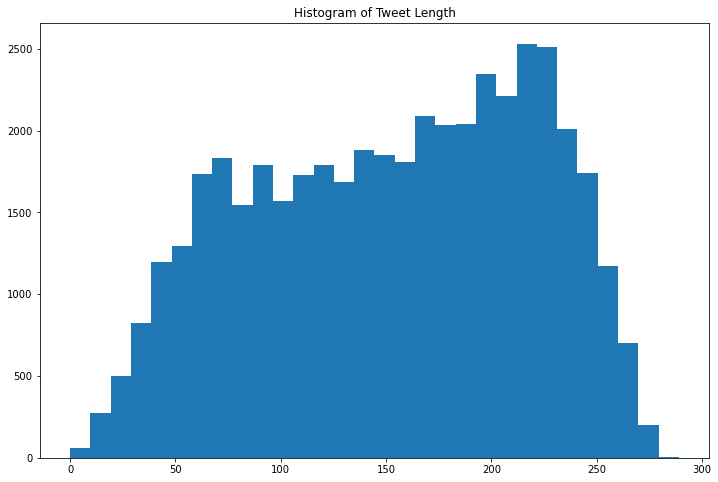

In [21]:
eda_data["TweetLength"] = eda_data["CleanedTweet"].map(len)
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.hist(eda_data['TweetLength'], bins=30)
ax.set_title('Histogram of Tweet Length')
ax.set_xlabel('')
plt.show()

### Some statistics related to the different categories

In [19]:
#Inserting the Sentiment column into the new data frame. A 3-class Sentiment column was also created to have Negative, Neutral, and Positive classes.
eda_data["Sentiment"] = data["Sentiment"]
eda_data["Sentiment2"]= eda_data["Sentiment"].map({"Neutral":"Neutral", "Positive":"Positive", "Negative":"Negative", "Extremely Negative":"Negative", "Extremely Positive":"Positive"})

In [23]:
eda_data.head()

,Location,OriginalTweet,CleanedTweet,Tokenized_Spacy,Tokenized_nltk,Sentiment,Sentiment2,TweetLength
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,and and,,,Neutral,Neutral,7
1,UK,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk neighbour family exchange phone nu...,advice talk neighbour family exchange phone nu...,Positive,Positive,237
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworth elderly disabl...,coronavirus australia woolworth give elderly d...,Positive,Positive,102
3,NaN,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...,food stock panic food need stay calm stay safe,food stock one empty please panic enough food ...,Positive,Positive,165
4,NaN,"Me, ready to go at supermarket during the #COV...",me ready to go at supermarket during the outbr...,ready supermarket outbreak paranoid food stock...,ready go supermarket outbreak paranoid food st...,Extremely Negative,Negative,186


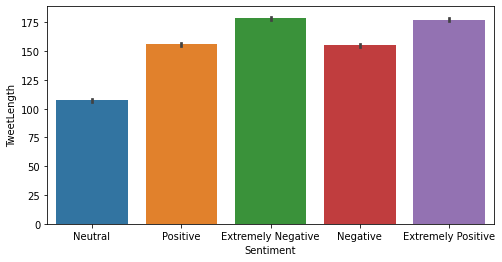

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(x='Sentiment', y='TweetLength' , data=eda_data)
plt.show()

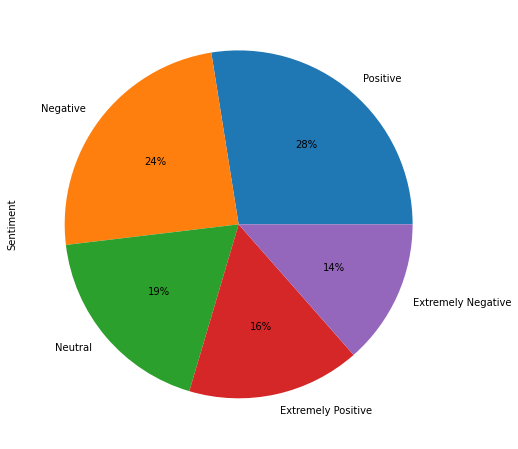

In [25]:
plt.figure(figsize=(12,8))
eda_data["Sentiment"].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

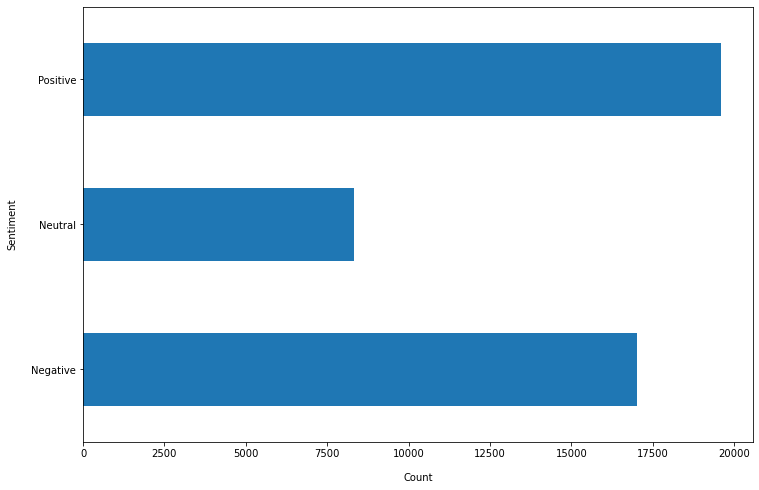

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12,8), )
eda_data['Sentiment2'].value_counts().sort_index().plot(kind='barh', ax=ax)

ax.set_xlabel("Count", labelpad=14)
ax.set_ylabel("Sentiment", labelpad=14);
# ax.set_title(" Sentiment", y=1.02);




# Word Cloud
It is often of interest to have a visual insight of the frequent words used by people when they have different feelings. In fact, those words and the frequency of them in a short or long sentence can lead us to infere the conveying emotions. WordCloud(https://github.com/amueller/word_cloud) provide us with such an interesting visualization.We may have a cloud of arbitrary shape filled by different words each with a specific size which determines how frequent that word has been used in the text.In other words, the sizes of the words in the cloud represent the frequency or the importance of each word.(https://www.datacamp.com/community/tutorials/wordcloud-python)

In [41]:
from wordcloud import WordCloud
def wordCloudCreator(sentimentCol="Sentiment2",Sentiment="Positive", TokenizedTweets="Tokenized_Spacy",stopwords=None, N=300):
    '''This function returns a world cloud of tweets regarding the epecified sentiment.'''
    Data = eda_data[eda_data[sentimentCol]==Sentiment]
    Tweets = Data[TokenizedTweets].to_string(index = False)
    wordCloud = WordCloud(width = 800, height = 800,max_words=N,stopwords = stopwords,
                          background_color ='white', min_font_size = 10).generate(Tweets)
    return(wordCloud)
    

## Word cloud using spacy data

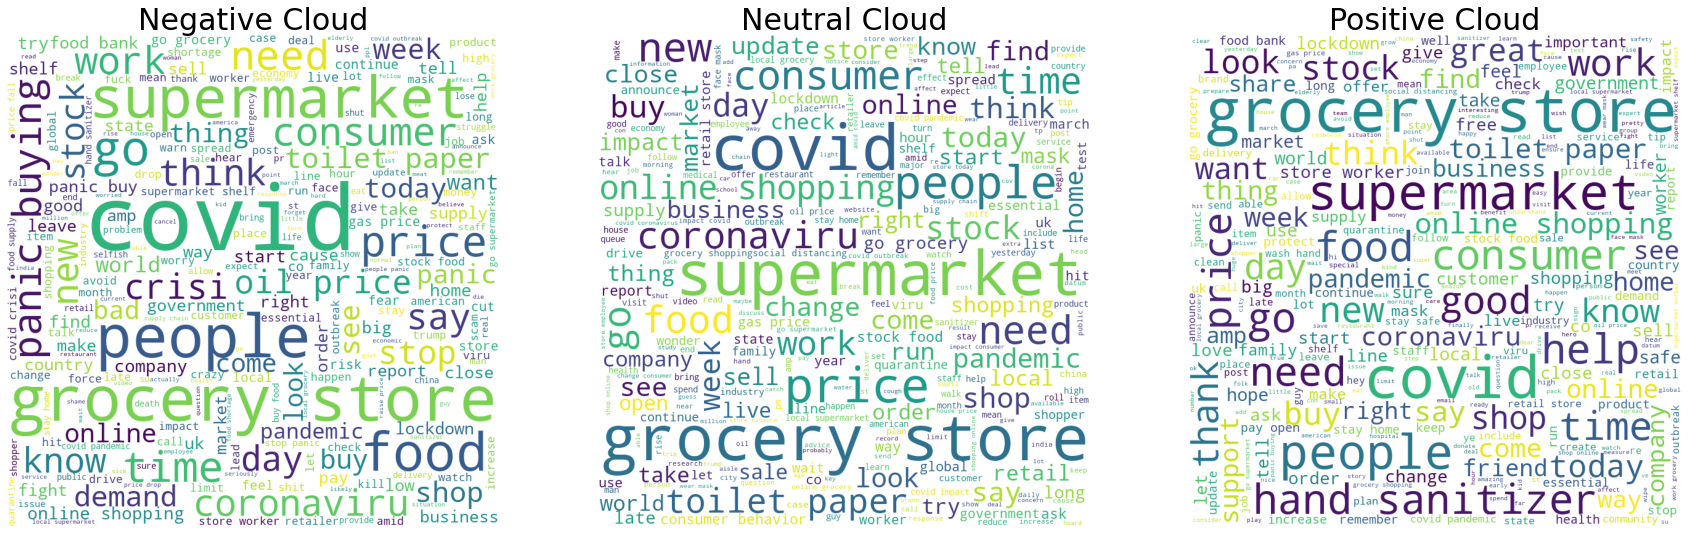

In [42]:

#Positive wordCloud
pos_wordCloud = wordCloudCreator(Sentiment="Positive")
#Negative wordCloud
neg_wordCloud = wordCloudCreator(Sentiment="Negative")
#Neutral wordCloud
neut_wordCloud = wordCloudCreator(Sentiment="Neutral")



fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))

ax1.imshow(neg_wordCloud)
ax1.set_title('Negative Cloud', fontsize = 30)
ax1.axis('off')
ax2.imshow(neut_wordCloud)
ax2.set_title('Neutral Cloud', fontsize = 30)
ax2.axis('off')
ax3.imshow(pos_wordCloud)
ax3.set_title('Positive Cloud', fontsize = 30)
ax3.axis('off')

plt.show()

## Word cloud using NLTK data

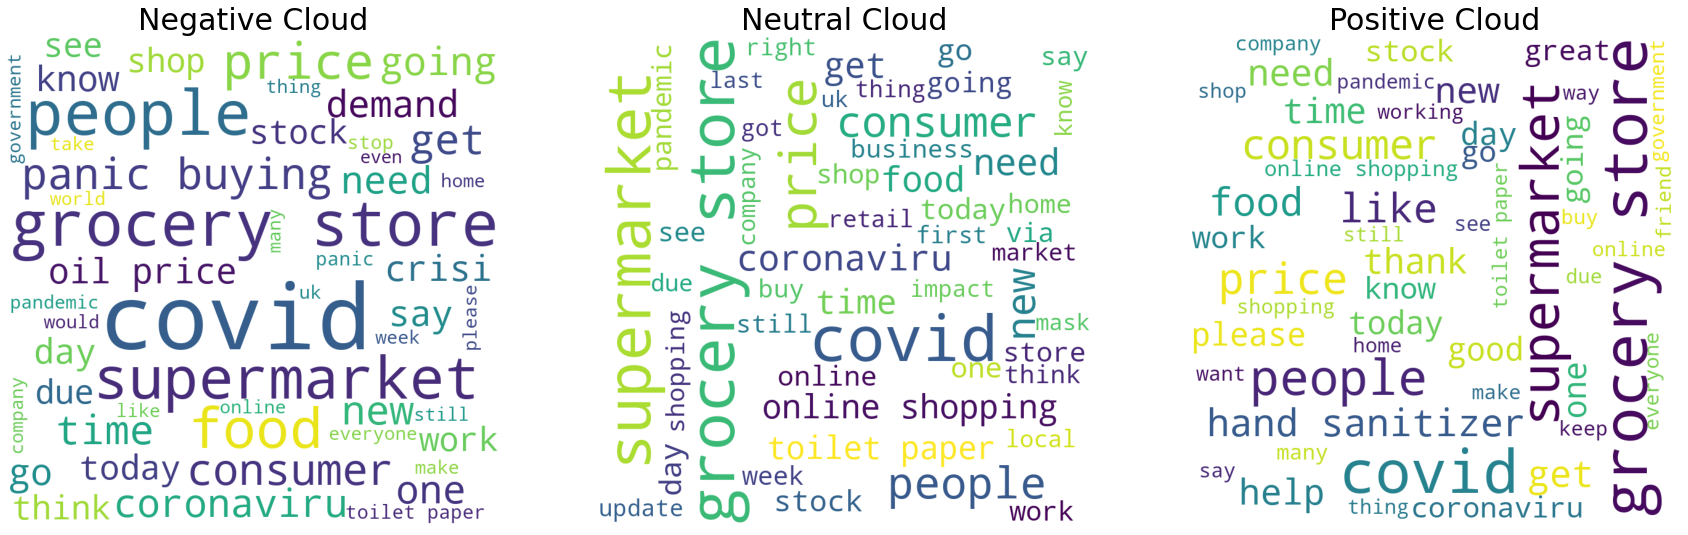

In [21]:
#Positive wordCloud
pos_wordCloud = wordCloudCreator(TokenizedTweets="Tokenized_nltk",Sentiment="Positive", stopwords=stopwords)
#Negative wordCloud
neg_wordCloud = wordCloudCreator(TokenizedTweets="Tokenized_nltk",Sentiment="Negative", stopwords=stopwords)
#Neutral wordCloud
neut_wordCloud = wordCloudCreator(TokenizedTweets="Tokenized_nltk",Sentiment="Neutral", stopwords=stopwords)



fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))

ax1.imshow(neg_wordCloud)
ax1.set_title('Negative Cloud', fontsize = 30)
ax1.axis('off')
ax2.imshow(neut_wordCloud)
ax2.set_title('Neutral Cloud', fontsize = 30)
ax2.axis('off')
ax3.imshow(pos_wordCloud)
ax3.set_title('Positive Cloud', fontsize = 30)
ax3.axis('off')

plt.show()

In [22]:
#Word cloud using 5 categories in Sentiment
# stopwords = set(STOPWORDS)

#Extremely Positive words
exPos_wordCloud = wordCloudCreator(sentimentCol="Sentiment",Sentiment="Extremely Positive",TokenizedTweets="Tokenized_nltk", stopwords=stopwords)

#Positive words
pos_wordCloud = wordCloudCreator(sentimentCol="Sentiment",TokenizedTweets="Tokenized_nltk",Sentiment="Positive", stopwords=stopwords)

#Extremely Negative words
exNeg_wordCloud = wordCloudCreator(sentimentCol="Sentiment",TokenizedTweets="Tokenized_nltk",Sentiment="Extremely Negative", stopwords=stopwords)


#Negative words
neg_wordCloud = wordCloudCreator(sentimentCol="Sentiment",TokenizedTweets="Tokenized_nltk",Sentiment="Negative", stopwords=stopwords)

#Neutral words
neut_wordCloud = wordCloudCreator(sentimentCol="Sentiment",TokenizedTweets="Tokenized_nltk",Sentiment="Neutral", stopwords=stopwords)


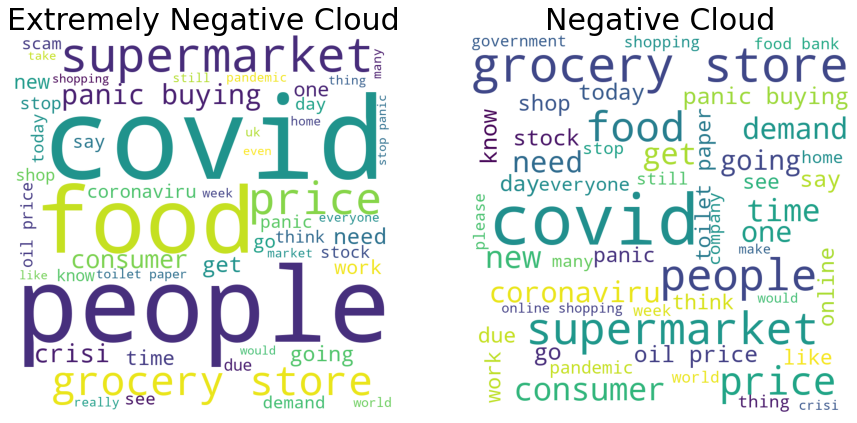

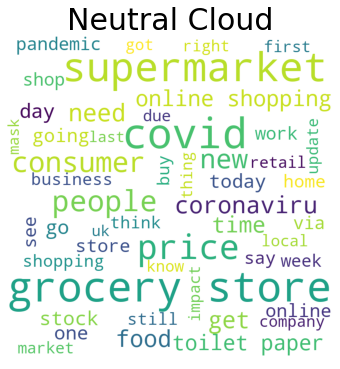

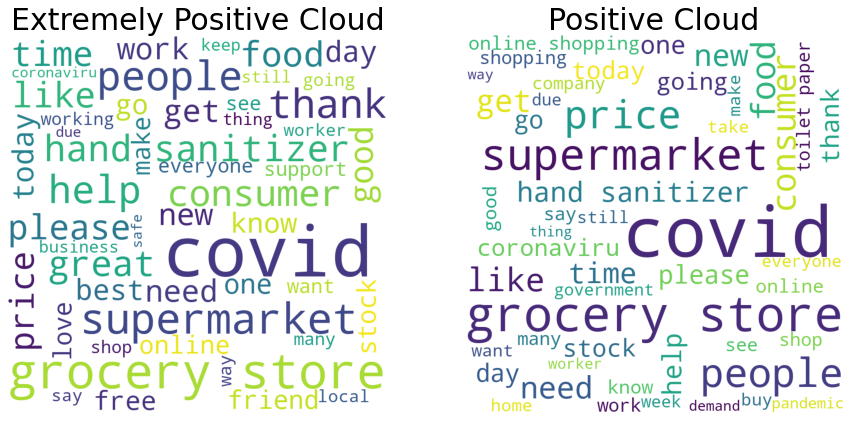

In [23]:
fig, ax = plt.subplots(1,2, figsize = [15,10])
ax[0].imshow(exNeg_wordCloud)
ax[0].set_title('Extremely Negative Cloud', fontsize = 30)
ax[0].axis('off')
ax[1].imshow(neg_wordCloud)
ax[1].set_title('Negative Cloud', fontsize = 30)
ax[1].axis('off')

fig, ax = plt.subplots(1,1, figsize = [10,6])
ax.imshow(neut_wordCloud)
ax.set_title('Neutral Cloud', fontsize = 30)
ax.axis('off')



fig, ax = plt.subplots(1,2, figsize = [15,10])
ax[0].imshow(exPos_wordCloud)
ax[0].set_title('Extremely Positive Cloud', fontsize = 30)
ax[0].axis('off')
ax[1].imshow(pos_wordCloud)
ax[1].set_title('Positive Cloud', fontsize = 30)
ax[1].axis('off')



plt.show()

# N_Grams

Sometimes it is very informative,particulary for sentiment analysis of a special subject, to know how the words have been used in a review or a tweet. In other words, we would like to analyse the consecutive words that appear frequelntly together. Analysing the frequency of words that often appear consecutively, known as collocation analysing(http://www.nltk.org/api/nltk.html?highlight=ngram), in a bunch of tweets or reviews may help the politicians, decision makers, businessmen to make a decision accordingly to either make benefit from the outstanding opinions or to prevent the community from falling into trouble. It is also helpful to analyze the trending opinions of the people in favor of/against a topic, a policy, a hotel, a movie, ... .
To perform such an analysis N-Gram ranking from the NLTK package was implemented.An n-gram is simply a sequence of n words where n is a discrete number that can range from 1 to infinity. In n-gram ranking, we simply rank the n-grams according to how many times they appear in a body of text(https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460)

In [53]:
def cleanForGram(text):
    for char in text:
        if char in string.punctuation:
            text=text.replace(char, '')
    words = text.split()
    
    return words
    

def nGramsCreator(Sentiment="Positive", TokenizedTweets="Tokenized_Spacy", n=1, N=20):
    '''This function creats a data frame consisting the ngrams and their corresponding frequency.and
    returns a barplot.
    Params:
    data: the dataframe including the tweets.
    Sentiment: the sentiment for which we would like to extract the ngrams.
    TokenizedTweets: The tokenized tweets based which we would like to move forward. The column must already have created.
    n: integer specifying the n of the ngrams. How many consecutive words we are interested.
    N: N most frequent ngrams.'''
    Data = eda_data[eda_data["Sentiment2"]==Sentiment]
    Tweets = Data[TokenizedTweets]
    words=cleanForGram(str(Tweets.tolist()))
#     words = makeClean(str(Tweets.tolist())).split()
    df=pd.DataFrame((pd.Series(nltk.ngrams(words, n)).value_counts())[:N])
    title={1:'Uni-grams', 2:'Bi-grams', 3:"Tri-grams", 4:"4-grams"}
    df.plot(kind='barh',title='Top '+ str(N)+" " + title[n]+" From "+Sentiment+" Tweets",legend=False)
    
    

In [54]:

# sents=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']
sents=['Negative', 'Neutral', 'Positive']

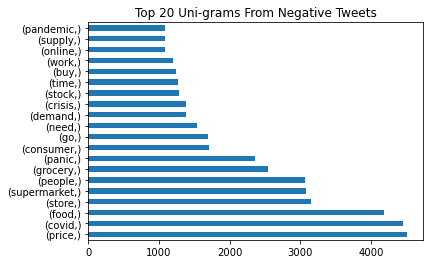

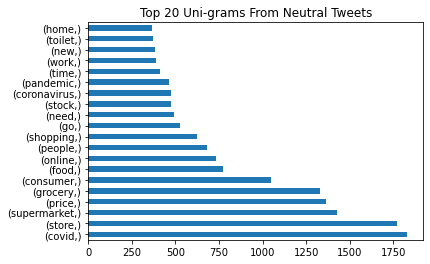

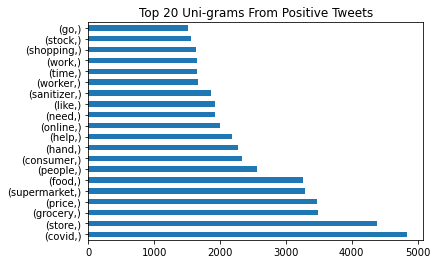

In [56]:
for sent in sents:
    nGramsCreator(Sentiment=sent)
    
    

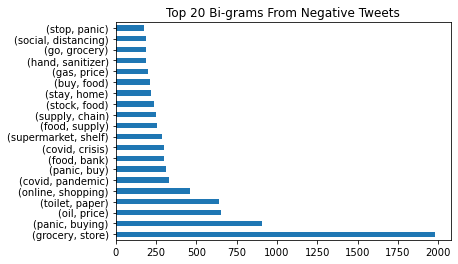

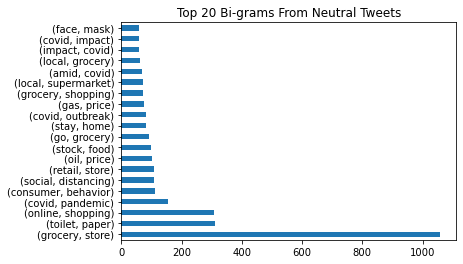

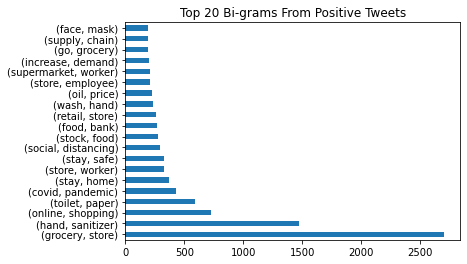

In [57]:
for sent in sents:
    nGramsCreator(Sentiment=sent, n=2)
    

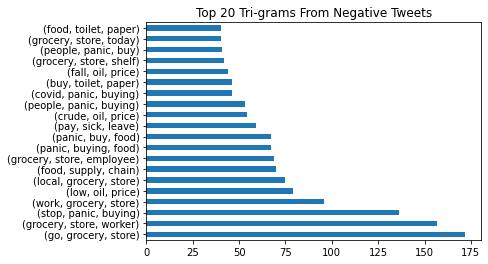

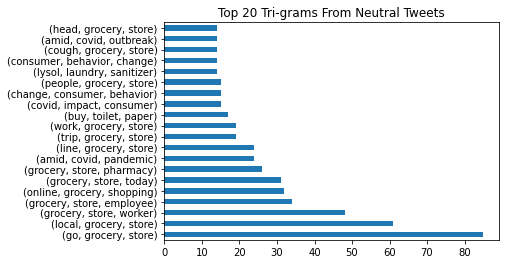

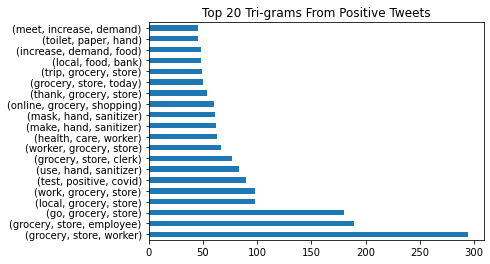

In [58]:
for sent in sents:
    nGramsCreator(Sentiment=sent, n=3)

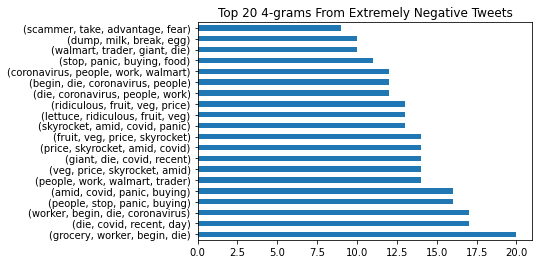

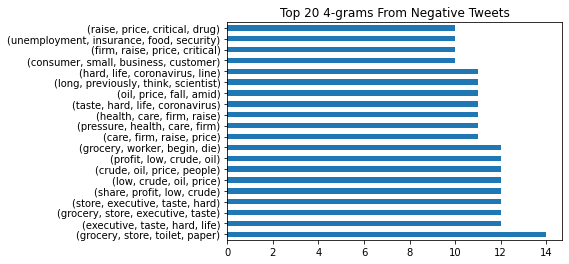

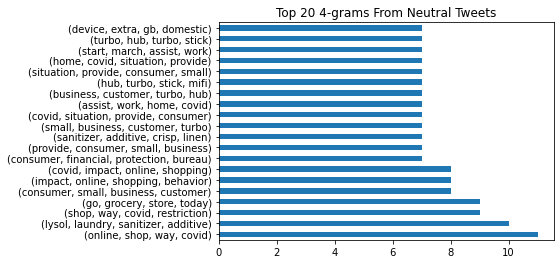

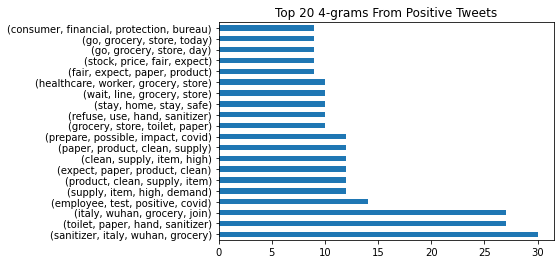

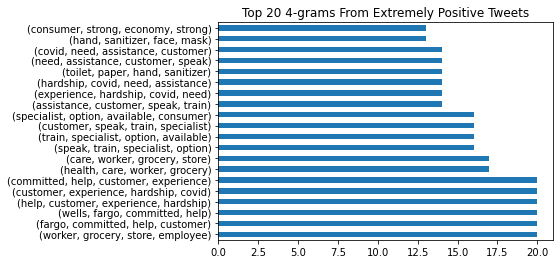

In [31]:
for sent in sents:
    nGramsCreator(Sentiment=sent, n=4)